In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(rc={'figure.figsize': [15, 15]}, font_scale=1.3)

In [2]:
df = pd.read_csv('vgsales.csv')
color = sns.color_palette()[-1]
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 200)

In [3]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


### This is a video game sales dataset from kaggle (sorted by rank already).
#### The following are some questions and answers about the data set 
##### this is the dataset link and some info about it https://www.kaggle.com/datasets/gregorut/videogamesales?select=vgsales.csv

## By looking at the correlation of the data we see that:
### 1- the only high correlation is between the sales (global , eu , na or other) and the rankings of the games .
### 2- The NA region gets higher sales when the rank of the game is higher more than more than other regions. This also means they spend money on games more than any other region.

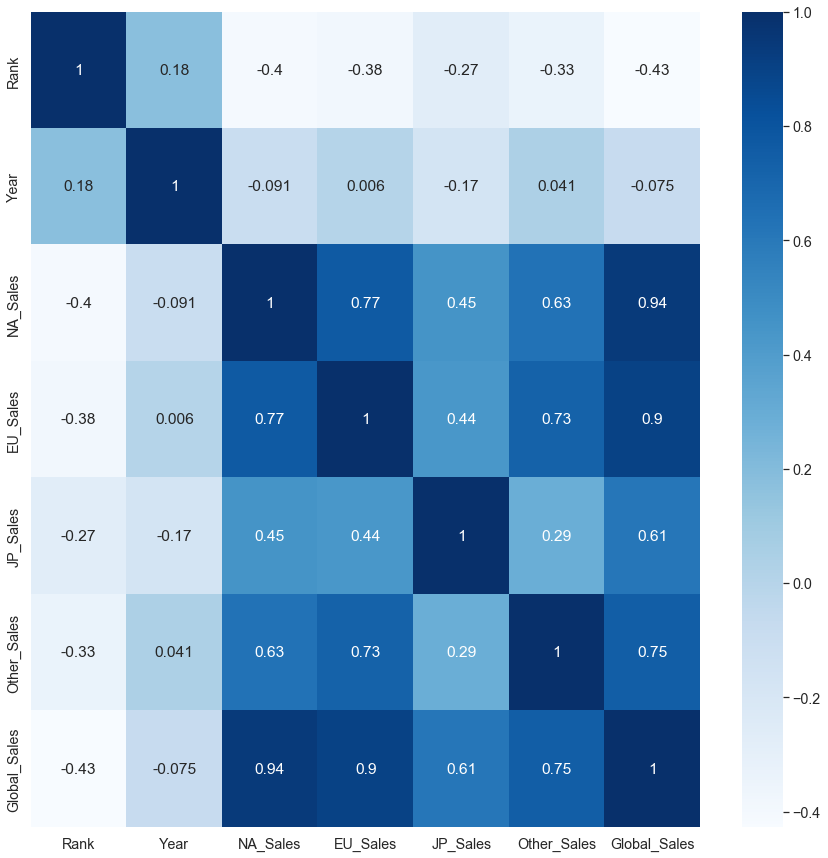

In [33]:
sns.heatmap(df.corr(), annot=True, cmap = 'Blues')

### 1) What are the platforms who have most sales?

In [4]:
platforms_df = df.copy()
platforms_df = platforms_df.groupby('Platform',as_index=False)['Global_Sales'].sum().sort_values(ascending = False,by="Global_Sales")
platforms_df.head(10)

,Platform,Global_Sales
16,PS2,1255.64
28,X360,979.96
17,PS3,957.84
26,Wii,926.71
4,DS,822.49
15,PS,730.66
6,GBA,318.50
19,PSP,296.28
18,PS4,278.10
13,PC,258.82


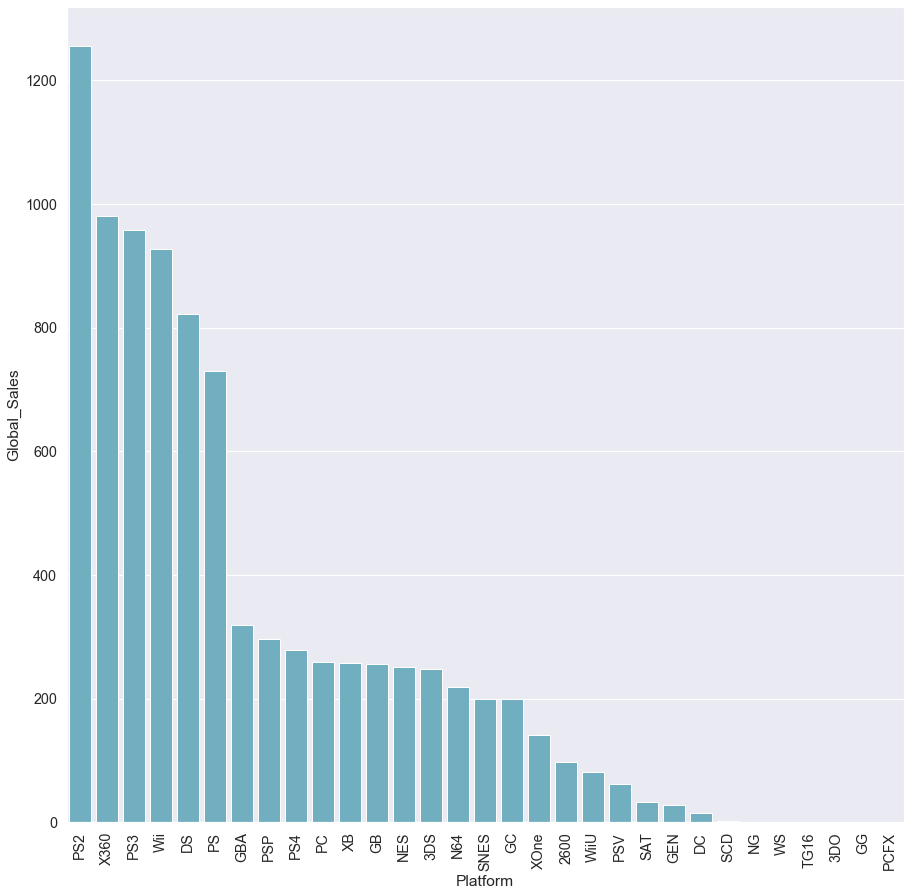

In [5]:
plt.xticks(rotation = 90);
sns.barplot(data = platforms_df, x = 'Platform', y = 'Global_Sales', ci = None, color = color)

### 2) What is the region with most sales?

In [6]:
sales = df.sum(axis=0)[['NA_Sales','EU_Sales','EU_Sales','Other_Sales']].sort_values(ascending = False)
sales

NA_Sales       4392.95
EU_Sales       2434.13
EU_Sales       2434.13
Other_Sales     797.75
dtype: object

### 3) What is the year with most sales?

In [7]:
years_df = df.groupby('Year',as_index=False)['Global_Sales'].sum().sort_values(ascending = False,by="Global_Sales")
years_df.head(10)

,Year,Global_Sales
28,2008.0,678.90
29,2009.0,667.30
27,2007.0,611.13
30,2010.0,600.45
26,2006.0,521.04
31,2011.0,515.99
25,2005.0,459.94
24,2004.0,419.31
22,2002.0,395.52
33,2013.0,368.11


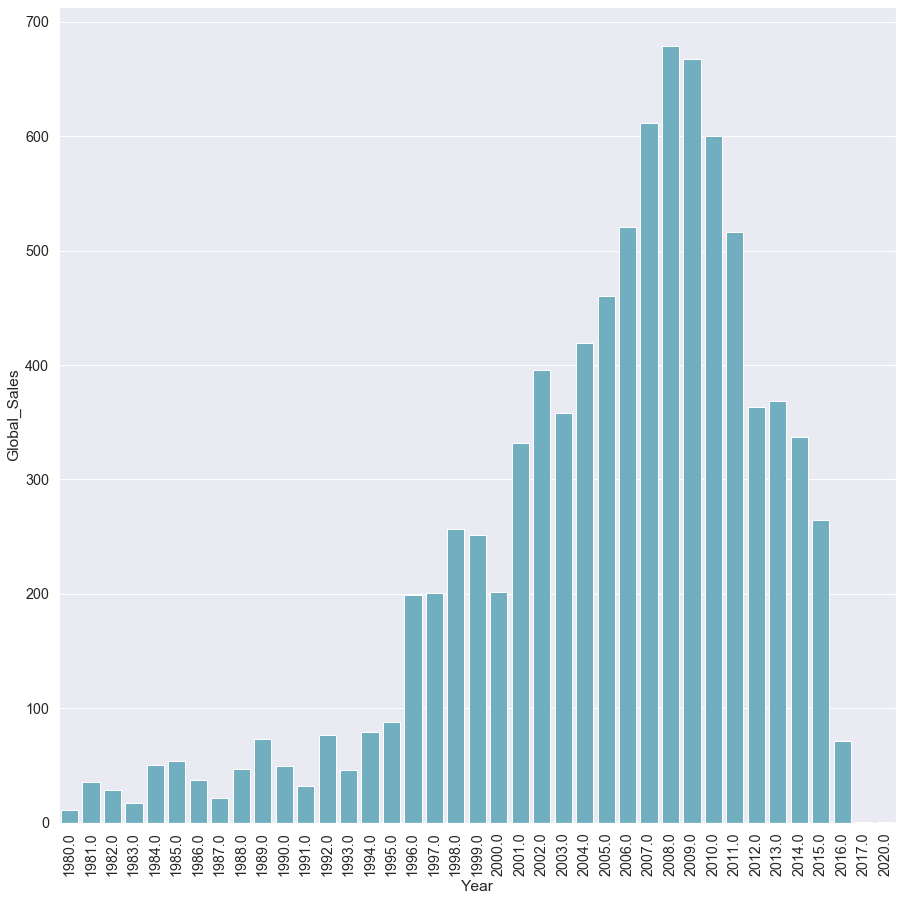

In [8]:
sns.barplot(data = years_df, x = 'Year', y = 'Global_Sales', ci = None, color = color)
plt.xticks(rotation = 90);

### 4) What are the best-selling genres?

In [9]:
bst_genres = df.groupby('Genre',as_index=False)['Global_Sales'].sum().sort_values(ascending = False,by="Global_Sales")
bst_genres

,Genre,Global_Sales
0,Action,1751.18
10,Sports,1330.93
8,Shooter,1037.37
7,Role-Playing,927.37
4,Platform,831.37
3,Misc,809.96
6,Racing,732.04
2,Fighting,448.91
9,Simulation,392.20
5,Puzzle,244.95


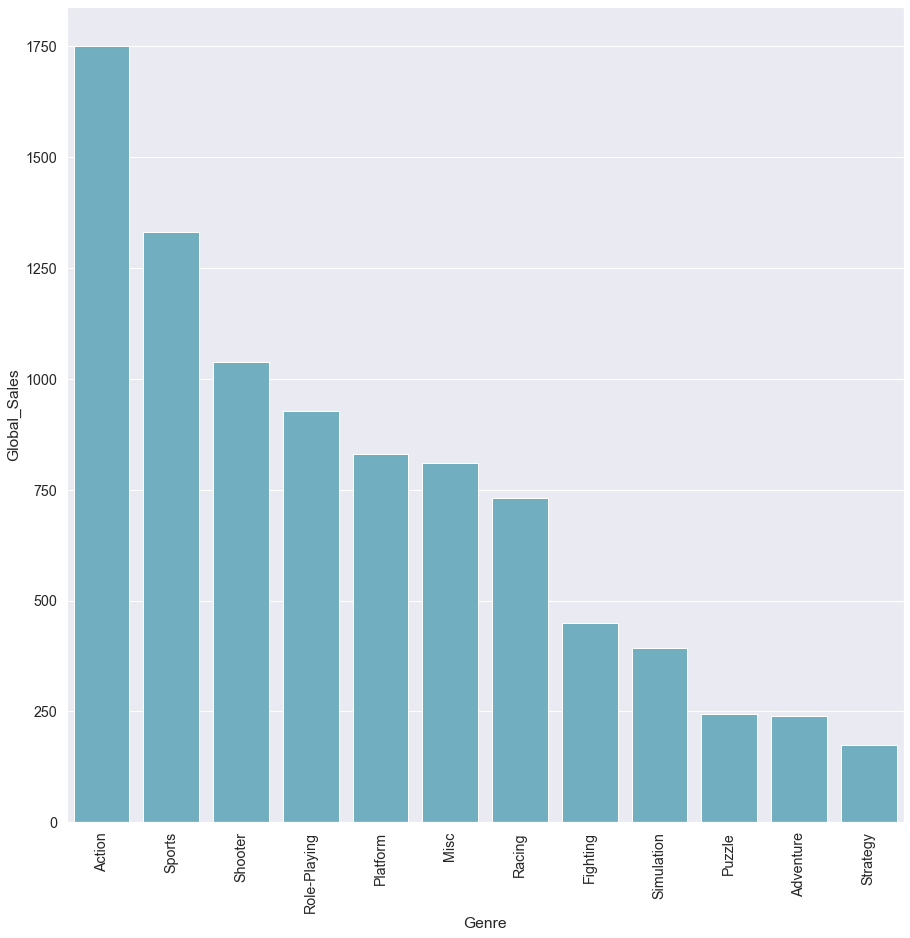

In [10]:
sns.barplot(data = bst_genres, x = 'Genre', y = 'Global_Sales', ci = None, color = color)
plt.xticks(rotation = 90);

### 5) Who are the best-selling 100 games most published by? / Who are the most succesfull publishers?

In [11]:
bst100_pubs = df.iloc[:100].groupby('Publisher',as_index=False)['Global_Sales'].sum().sort_values(ascending = False,by="Global_Sales")
bst100_pubs

,Publisher,Global_Sales
5,Nintendo,920.28
0,Activision,165.88
9,Take-Two Interactive,129.13
7,Sony Computer Entertainment,83.20
4,Microsoft Game Studios,71.29
3,Electronic Arts,39.85
10,Ubisoft,19.78
2,Bethesda Softworks,8.84
6,Sega,8.06
8,SquareSoft,7.86


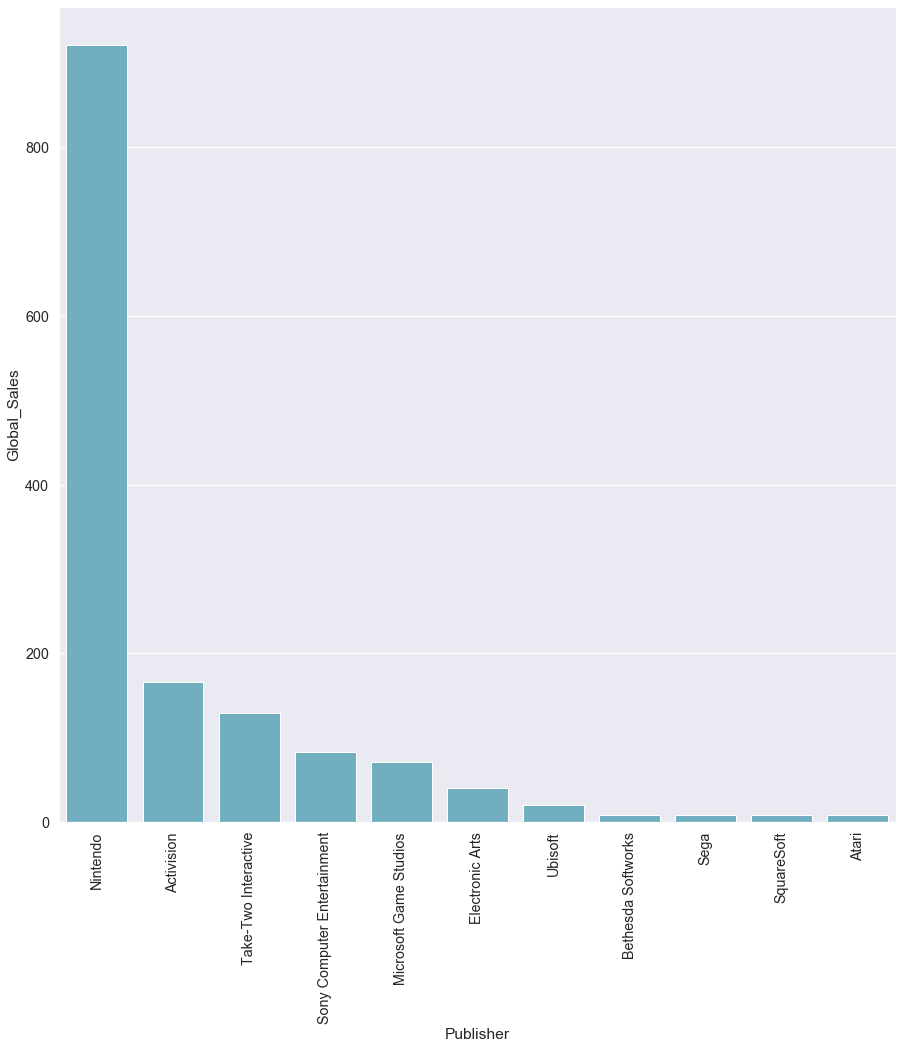

In [12]:
sns.barplot(data = bst100_pubs, x = 'Publisher', y = 'Global_Sales', ci = None, color = color)
plt.xticks(rotation = 90);

### 6) What genres does these "most succesfull" publishers make the most?

In [29]:
suc = df[df['Publisher'].isin(bst100_pubs['Publisher'])]
suc= suc.groupby(['Genre','Publisher'])[['Genre']].count()
suc

Genre
Genre        Publisher                         
Action       Activision                     310
             Atari                           54
             Bethesda Softworks              17
             Electronic Arts                183
             Microsoft Game Studios          21
             Nintendo                        79
             Sega                           101
             Sony Computer Entertainment     90
             Take-Two Interactive            93
             Ubisoft                        193
Adventure    Activision                      25
             Atari                           17
             Electronic Arts                 13
             Microsoft Game Studios           3
             Nintendo                        35
             Sega                            31
             Sony Computer Entertainment     41
             Take-Two Interactive            12
             Ubisoft                         59
Fighting     Activision                       7
             Atari                           37
             Electronic Arts                 39
             Microsoft Game Studios           5
             Nintendo                        18
             Sega                            37
             Sony Computer Entertainment     30
             SquareSoft                       4
             Take-Two Interactive             1
             Ubisoft                         19
Misc         Activision                     103
             Atari                           26
             Electronic Arts                 46
             Microsoft Game Studios          34
             Nintendo                       100
             Sega                            62
             Sony Computer Entertainment    128
             Take-Two Interactive            27
             Ubisoft                        151
Platform     Activision                      60
             Atari                           21
             Electronic Arts                 16
             Microsoft Game Studios           6
             Nintendo                       112
             Sega                            52
             Sony Computer Entertainment     66
             Take-Two Interactive            11
             Ubisoft                         70
Puzzle       Activision                       7
             Atari                           22
             Electronic Arts                  7
             Microsoft Game Studios           1
             Nintendo                        74
             Sega                            22
             Sony Computer Entertainment     12
             Take-Two Interactive             1
             Ubisoft                         24
Racing       Activision                      74
             Atari                           36
             Bethesda Softworks               7
             Electronic Arts                159
             Microsoft Game Studios          22
             Nintendo                        37
             Sega                            48
             Sony Computer Entertainment     65
             SquareSoft                       1
             Take-Two Interactive            20
             Ubisoft                         52
Role-Playing Activision                      41
             Atari                           28
             Bethesda Softworks              17
             Electronic Arts                 35
             Microsoft Game Studios          16
             Nintendo                       106
             Sega                            64
             Sony Computer Entertainment     49
             SquareSoft                      38
             Take-Two Interactive             6
             Ubisoft                         41
Shooter      Activision                     159
             Atari                           40
             Bethesda Softworks              21
             Electronic Arts                139
          

### 7) What are the nentindo games made in the year with most profit (2008)?

In [14]:
ngames = df[(df['Year']== 2008) & (df['Publisher']=='Nintendo')].set_index('Name')
ngames[['Rank','Publisher','Year','Global_Sales']]

,Rank,Publisher,Year,Global_Sales
Name,,,,
Mario Kart Wii,3,Nintendo,2008.0,35.82
Super Smash Bros. Brawl,40,Nintendo,2008.0,13.04
Pokémon Platinum Version,89,Nintendo,2008.0,7.84
Animal Crossing: City Folk,227,Nintendo,2008.0,4.68
Professor Layton and the Unwound Future,400,Nintendo,2008.0,3.36
Wii Music,413,Nintendo,2008.0,3.27
Rhythm Heaven,433,Nintendo,2008.0,3.17
Kirby Super Star Ultra,482,Nintendo,2008.0,2.96
Style Savvy,586,Nintendo,2008.0,2.61


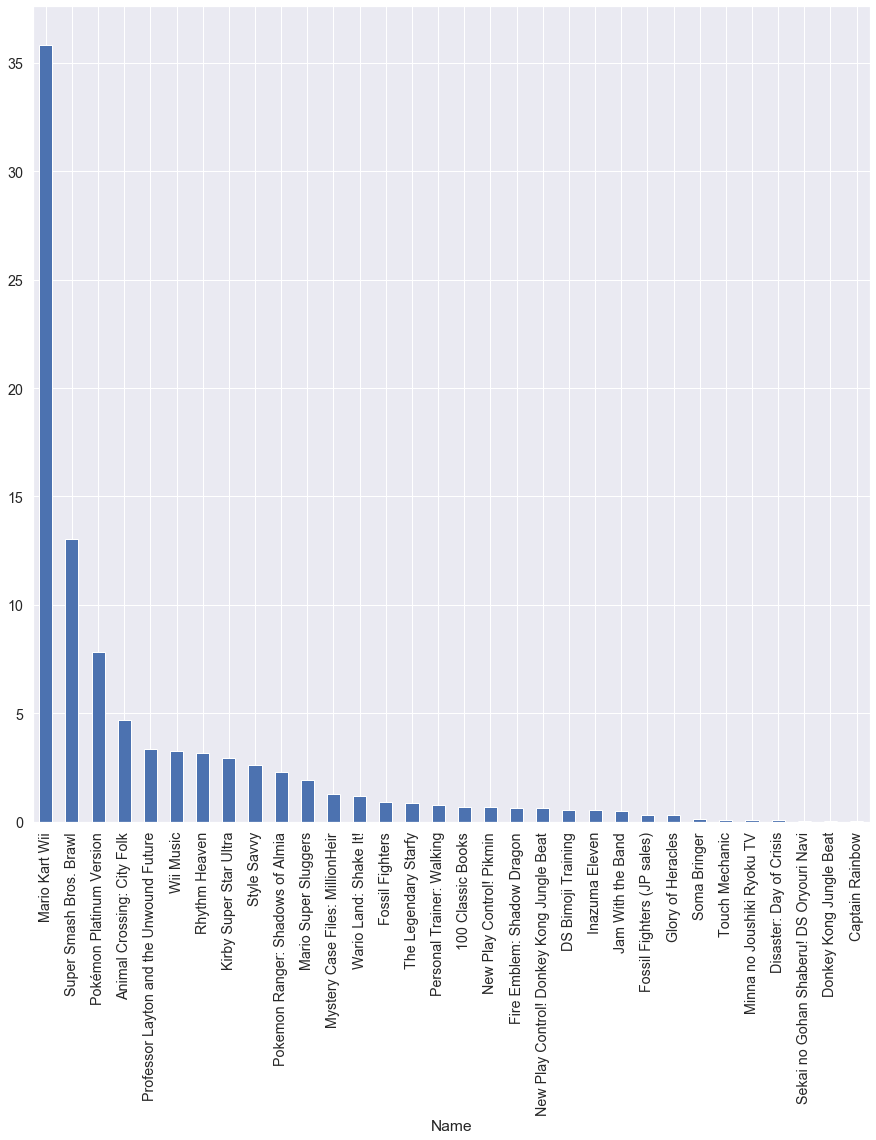

In [15]:
ngames['Global_Sales'].plot(kind = 'bar')

### 8) From the year 2010 till now, what are the top 10 best-selling games in EU?

In [16]:
year2010EU = df[(df['Year']>= 2010)].groupby('Name',as_index=False)['EU_Sales'].sum().sort_values(ascending = False,by="EU_Sales").set_index('Name')
year2010EU.head(10)

,EU_Sales
Name,
Grand Theft Auto V,23.04
FIFA 15,12.40
Call of Duty: Modern Warfare 3,11.29
FIFA 16,11.29
FIFA 14,11.14
Call of Duty: Black Ops II,11.05
FIFA Soccer 13,10.25
Call of Duty: Black Ops 3,9.56
Call of Duty: Ghosts,9.05


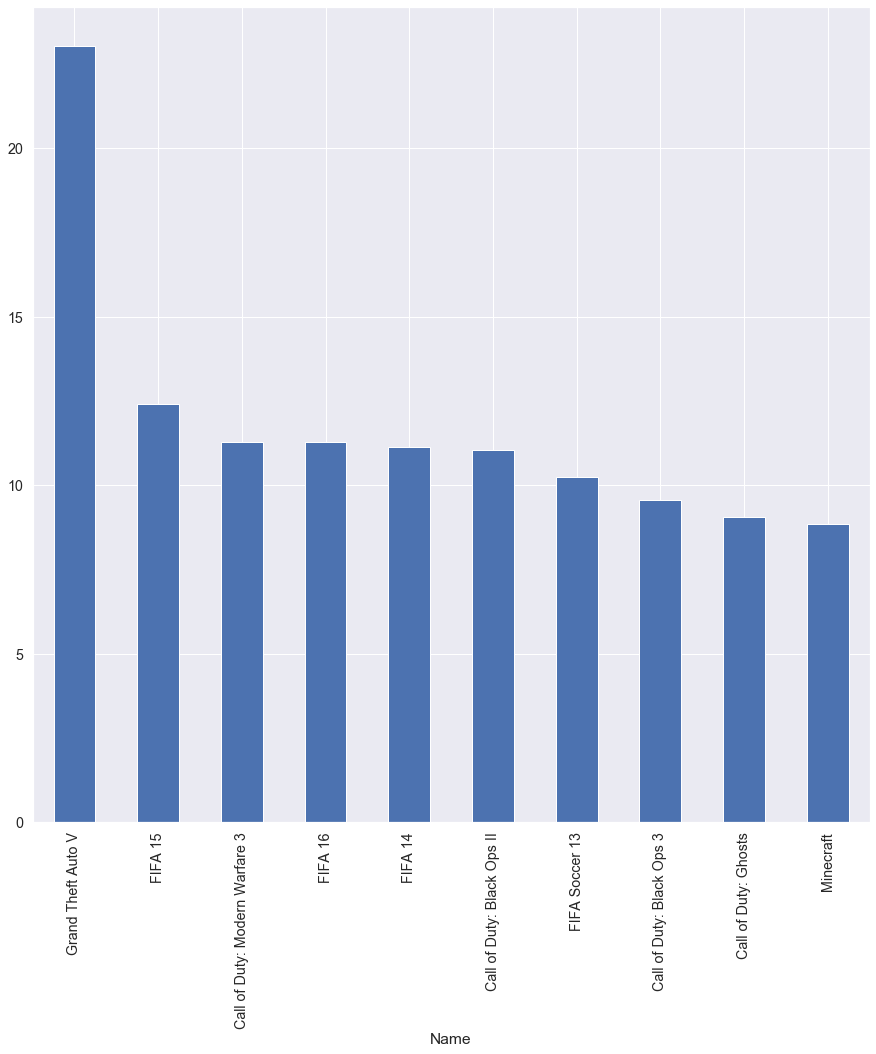

In [17]:
year2010EU.head(10)['EU_Sales'].plot(kind = 'bar')

### 9) what are the top 10 best-selling games in 'Other' region of all time?

In [18]:
Othersales = df.groupby('Name',as_index=False)['Other_Sales'].sum().sort_values(ascending = False,by="Other_Sales").set_index('Name')
Othersales.head(10)

,Other_Sales
Name,
Grand Theft Auto: San Andreas,10.72
Wii Sports,8.46
Grand Theft Auto V,8.03
Gran Turismo 4,7.53
Call of Duty: Black Ops II,3.88
FIFA Soccer 08,3.53
Pro Evolution Soccer 2008,3.51
Call of Duty: Black Ops 3,3.42
Call of Duty: Black Ops,3.36


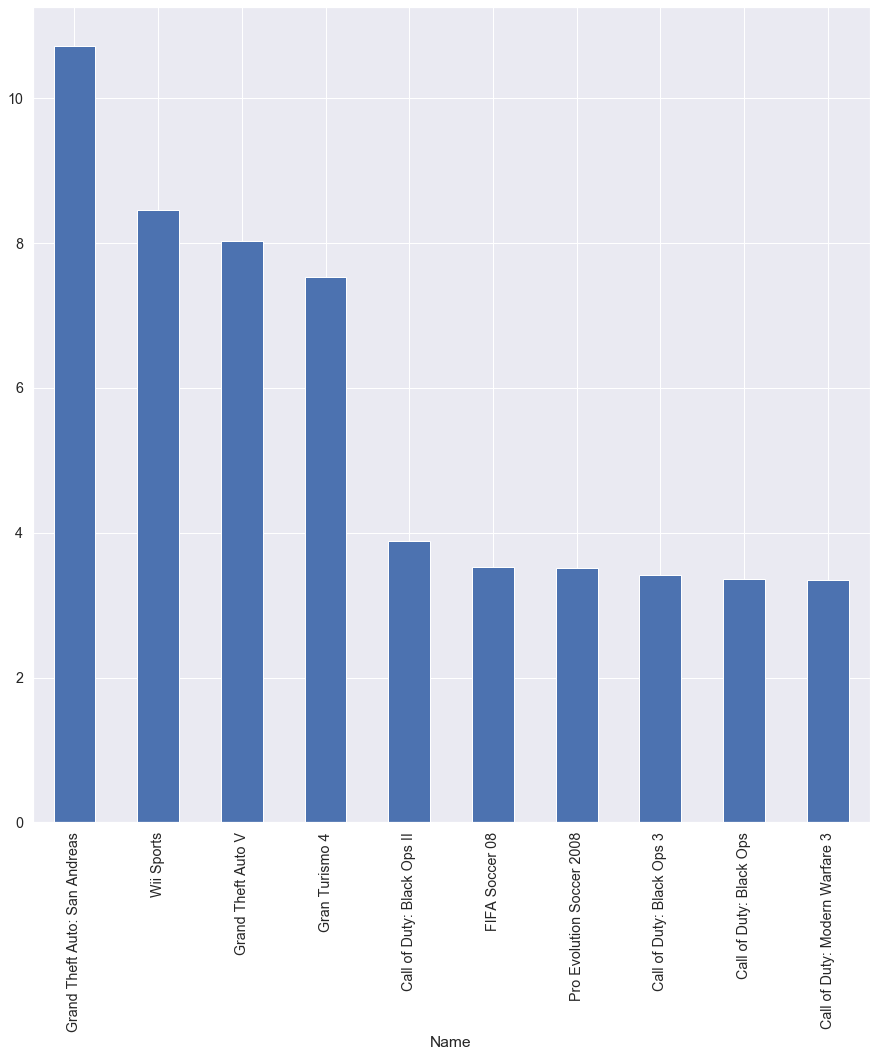

In [19]:
Othersales.head(10)['Other_Sales'].plot(kind = 'bar')